# ECBM 4040 Fall '21 Project  - BIOM Group
# Tutorial displaying core NeuroSEED replication software functionality

## Initialization

In [1]:
import numpy as np
import tensorflow as tf
import pickle
from matplotlib import pyplot as plt

import shutil
import os

from model.models_cstm import get_embedding_model
from model.train_model import train_siamese_model


In [2]:
DISTANCE_METRICS = {
    'EUCLIDEAN': 'euclidean',
    'HYPERBOLIC': 'hyperbolic',
    'MANHATTAN': 'manhattan',
    'SQUARE': 'square',
    'COSINE': 'cosine'
}

In [3]:
# set random number seeds for reproducible results
np.random.seed(1)
tf.random.set_seed(1)

## Get Qiita Data

In [4]:
cwd = os.getcwd()
if not os.path.exists(f"{cwd}/data/qiita/qiita_numpy.pkl"):
    !wget https://www.dropbox.com/s/mv546rx259tgwaz/qiita_numpy.pkl
    shutil.move(f"{cwd}/qiita_numpy.pkl", f"{cwd}/data/qiita/qiita_numpy.pkl")

## Load Qiita Dataset

In [5]:
# Load QIITA dataset.
((X_train, X_test, X_val), (y_train, y_test, y_val)) = pickle.load(open(f"{cwd}/data/qiita/qiita_numpy.pkl", "rb"))

## Train Siamese Model

In [6]:
embedding = get_embedding_model(model_choice='MLP')
embedding.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 152)               0         
_________________________________________________________________
one_hot_encoding_layer (OneH (None, 152, 4)            0         
_________________________________________________________________
flatten (Flatten)            (None, 608)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               77952     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
Total params: 110,976
Trainable params: 110,976
Non-trainable params: 0
__________________________________________________

In [7]:
# Train and Test Siamese Model

data = ((X_train, X_test, X_val), (y_train, y_test, y_val))
dist = DISTANCE_METRICS['MANHATTAN']

model, score, history = train_siamese_model(data, embedding, dist , batch_size=512, epochs=3)

Epoch 1/3
47844/47844 [==============================] - 694s 15ms/step - loss: 26.0540 - val_loss: 24.2665
Epoch 2/3
47844/47844 [==============================] - 684s 14ms/step - loss: 9.9372 - val_loss: 21.3897
Epoch 3/3
2195/2195 [==============================] - 16s 7ms/step - loss: 20.4711


In [8]:
print(f'Score for Siamese Model using {dist} distance: {score}')

Score for Siamese Model using manhattan distance: 20.47113800048828


## Visualize Loss 

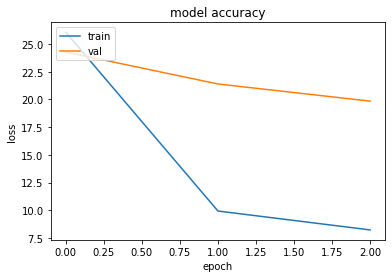

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()